# 📊 Atividade Prática – Regressão com Rede Neural MLP

---

### Integrantes do Grupo

* **Lucas Gabriel**
* **Vivian Raquel**
* **Samuel Araujo**
* **Fernanda Araujo**

---

### Descrição do Problema

Neste trabalho, será abordado um **problema real de regressão**, utilizando dados públicos de consumo de energia elétrica residencial. O objetivo é prever valores contínuos relacionados ao consumo elétrico a partir de variáveis numéricas, aplicando técnicas de **Aprendizado Profundo com Redes Neurais do tipo MLP (Multi-Layer Perceptron)**.

O foco está na aplicação prática de um **pipeline completo de aprendizado de máquina**, envolvendo pré-processamento de dados, treinamento, validação e avaliação do modelo.

---

### Objetivo da Regressão

O objetivo principal deste projeto é:

* Construir um modelo de **regressão baseado em MLP** capaz de prever o consumo de energia elétrica com boa precisão.

---

### Dataset Utilizado

* **Nome:** Individual Household Electric Power Consumption Dataset
* **Fonte:** UCI Machine Learning Repository
* **Link:** [https://archive.ics.uci.edu/dataset/235/individual](https://archive.ics.uci.edu/dataset/235/individual)

O dataset contém medições de consumo elétrico coletadas ao longo do tempo, incluindo variáveis como tensão, corrente e consumo global


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
print("TESTE OK")

TESTE OK


## Pré-processamento dos dados

In [7]:
import pandas as pd

df = pd.read_csv(
    "dados.txt",
    sep=";",
    na_values="?",
    nrows=100000
)

In [8]:
# Dimensão do dataset
print(df.shape)


(100000, 9)


In [9]:
# Visualizar as primeiras linhas
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [9]:
# Identificar dados faltantes que podem afetar o modelo.
df.isnull().sum()


Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
# Remoção de linhas com valores ausentes
df = df.dropna()

# Nova dimensão do dataset
df.shape


(9998, 9)

In [10]:
X = df.drop(columns=["Global_active_power"])
y = df["Global_active_power"]

X.shape, y.shape


((100000, 8), (100000,))

In [13]:
# Remover colunas de data e hora
df_numerico = df.drop(columns=["Date", "Time"])

df_numerico.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [14]:
X = df_numerico.drop(columns=["Global_active_power"])
y = df_numerico["Global_active_power"]

X.dtypes


Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
from sklearn.model_selection import train_test_split

# Divisão em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((80000, 6), (20000, 6))

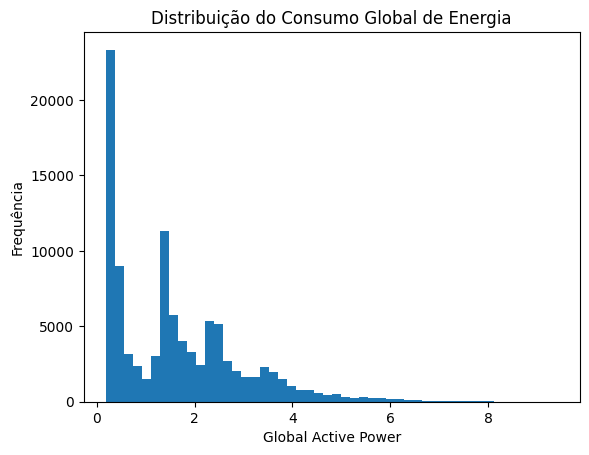

In [17]:
# Visualização da Variável Alvo (Exploração)
import matplotlib.pyplot as plt

plt.hist(y, bins=50)
plt.title("Distribuição do Consumo Global de Energia")
plt.xlabel("Global Active Power")
plt.ylabel("Frequência")
plt.show()
